https://github.com/fmfn/BayesianOptimization

# Exploitation vs Exploration

In [3]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from bayes_opt import BayesianOptimization

# use sklearn's default parameters for theta and random_start
gp_params = {"alpha": 1e-5, "n_restarts_optimizer": 2}

# Target function

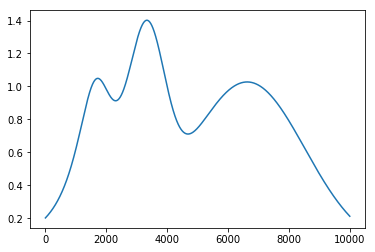

In [4]:
np.random.seed(42)
xs = np.linspace(-2, 10, 10000)
f = np.exp(-(xs - 2)**2) + np.exp(-(xs - 6)**2/10) + 1/ (xs**2 + 1)

plt.plot(f)
plt.show()

In [13]:
print("length of f: {} ".format(len(f)))

print("predict input: {}".format(np.arange(len(f)).reshape(-1, 1)))

length of f: 10000 
predict input: [[   0]
 [   1]
 [   2]
 ...
 [9997]
 [9998]
 [9999]]


# Utility function for plotting

In [9]:
def plot_bo(f, bo):
    
    print("Length of f: {}".format(len(f)))
    
    xs = [x["x"] for x in bo.res["all"]["params"]]
    ys = bo.res["all"]["values"]

    mean, sigma = bo.gp.predict(np.arange(len(f)).reshape(-1, 1), return_std=True)
    
    plt.figure(figsize=(16, 9))
    plt.plot(f)
    plt.plot(np.arange(len(f)), mean)
    plt.fill_between(np.arange(len(f)), mean+sigma, mean-sigma, alpha=0.1)
    plt.scatter(bo.X.flatten(), bo.Y, c="red", s=50, zorder=10)
    plt.xlim(0, len(f))
    plt.ylim(f.min()-0.1*(f.max()-f.min()), f.max()+0.1*(f.max()-f.min()))
    plt.show()
    return mean, sigma

# Acquisition Function "Upper Confidence Bound"

## Prefer exploitation (kappa=1.0)

Note that most points are around the peak(s).

/usr/local/lib/python3.5/dist-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'nit': 5, 'grad': array([-5.14058972e-05]), 'funcalls': 56, 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH'}
  " state: %s" % convergence_dict)


Length of f: 10000


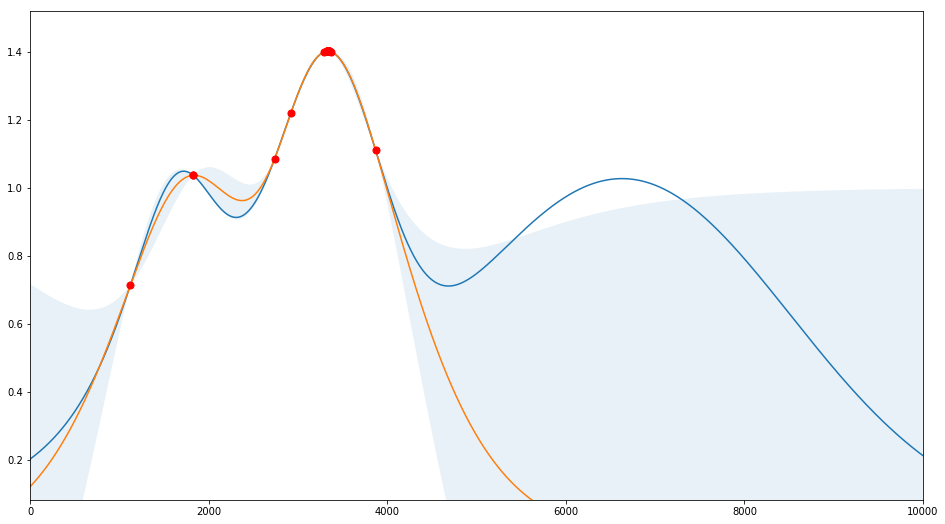

In [10]:
bo = BayesianOptimization(f=lambda x: f[int(x)],
                          pbounds={"x": (0, len(f)-1)},
                          verbose=0)

bo.maximize(init_points=2, n_iter=25, acq="ucb", kappa=1, **gp_params)

mean, sigma = plot_bo(f, bo)

In [11]:
mean

array([ 0.12049159,  0.1207725 ,  0.1210538 , ..., -0.0027709 ,
       -0.00276829, -0.00276568])

In [12]:
sigma

array([0.59675481, 0.59629985, 0.59584455, ..., 0.99992323, 0.9999234 ,
       0.99992356])

## Prefer exploration (kappa=10)

Note that the points are more spread out across the whole range.

/usr/local/lib/python3.5/dist-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'funcalls': 51, 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'warnflag': 2, 'grad': array([-5.59620053e-05]), 'nit': 6}
  " state: %s" % convergence_dict)


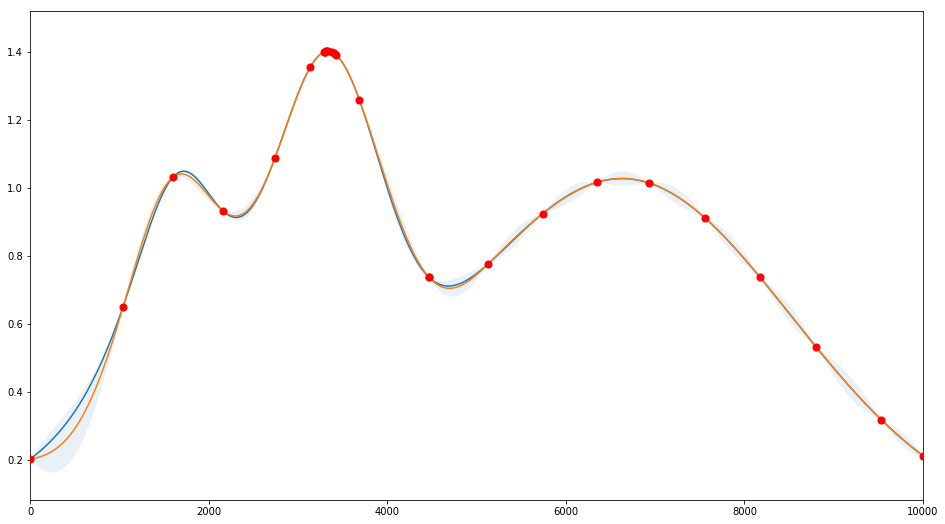

In [5]:
bo = BayesianOptimization(f=lambda x: f[int(x)],
                          pbounds={"x": (0, len(f)-1)},
                          verbose=0)

bo.maximize(init_points=2, n_iter=25, acq="ucb", kappa=10, **gp_params)

plot_bo(f, bo)

# Acquisition Function "Expected Improvement"

## Prefer exploitation (xi=0.0)

Note that most points are around the peak(s).

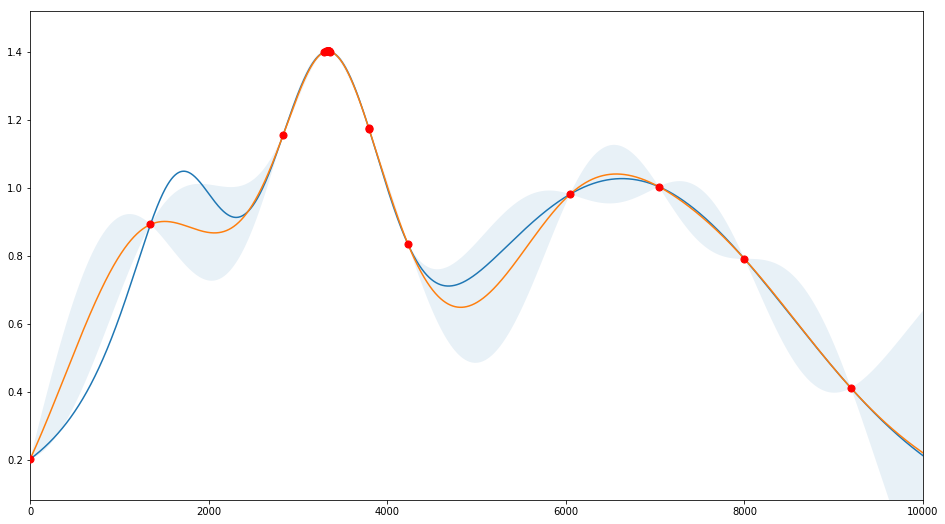

In [6]:
bo = BayesianOptimization(f=lambda x: f[int(x)],
                          pbounds={"x": (0, len(f)-1)},
                          verbose=0)

bo.maximize(init_points=2, n_iter=25, acq="ei", xi=1e-4, **gp_params)

plot_bo(f, bo)

## Prefer exploration (xi=0.1)

Note that the points are more spread out across the whole range.

/usr/local/lib/python3.5/dist-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'funcalls': 47, 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'warnflag': 2, 'grad': array([1.04680116e-05]), 'nit': 4}
  " state: %s" % convergence_dict)


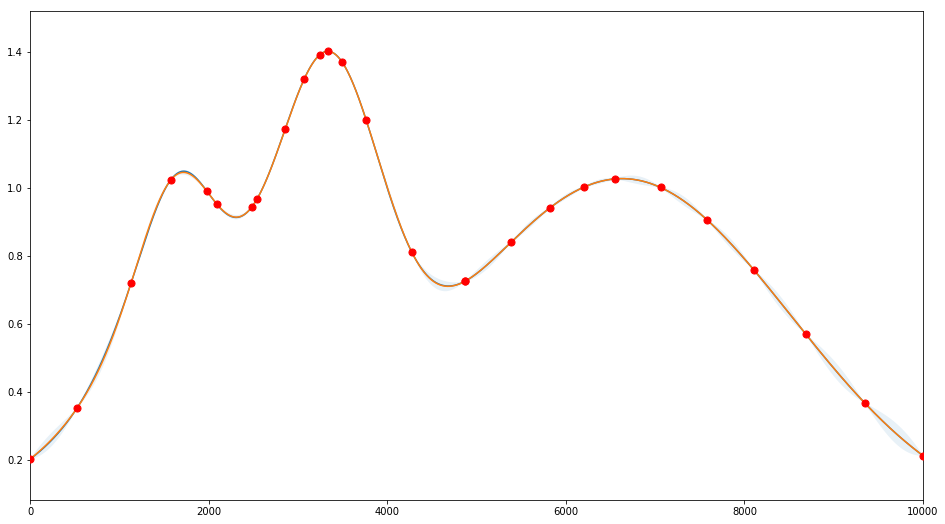

In [7]:
bo = BayesianOptimization(f=lambda x: f[int(x)], pbounds={"x": (0, len(f)-1)}, verbose=0)

bo.maximize(init_points=2, n_iter=25, acq="ei", xi=0.1, **gp_params)

plot_bo(f, bo)

# Acquisition Function "Probability of Improvement"

## Prefer exploitation (xi=0.0)

Note that most points are around the peak(s).

/usr/local/lib/python3.5/dist-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'funcalls': 53, 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'warnflag': 2, 'grad': array([-3.4004389e-05]), 'nit': 6}
  " state: %s" % convergence_dict)


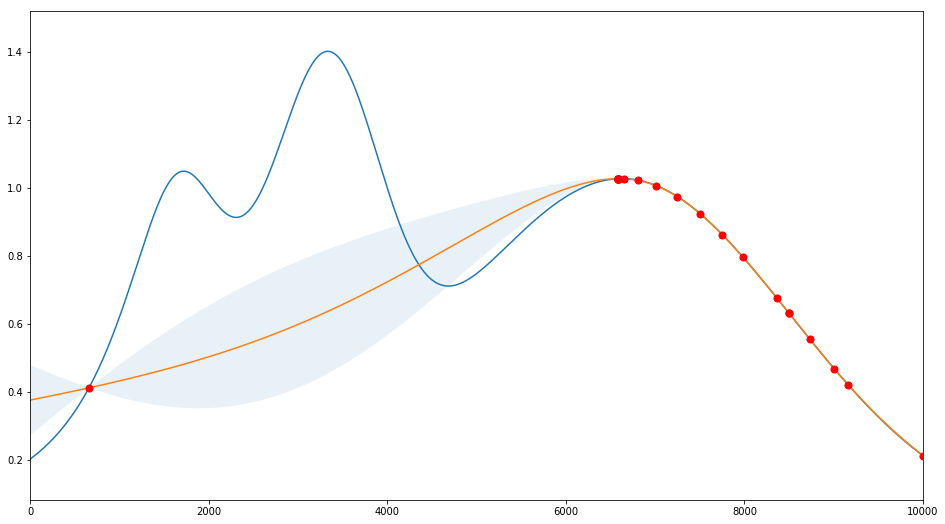

In [9]:
bo = BayesianOptimization(f=lambda x: f[int(x)],
                          pbounds={"x": (0, len(f)-1)},
                          verbose=0)

bo.maximize(init_points=2, n_iter=25, acq="poi", xi=1e-4, **gp_params)

plot_bo(f, bo)

## Prefer exploration (xi=0.1)

Note that the points are more spread out across the whole range.

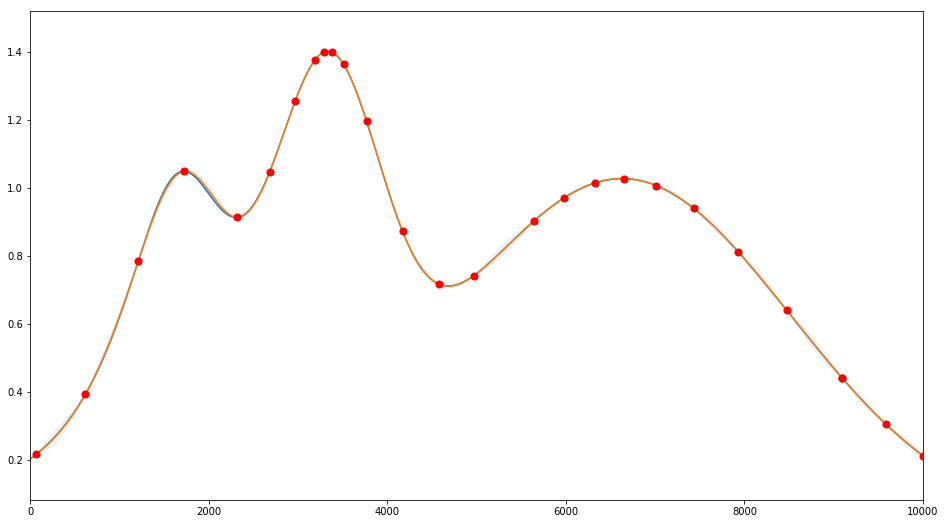

In [11]:
bo = BayesianOptimization(f=lambda x: f[int(x)], pbounds={"x": (0, len(f)-1)}, verbose=0)

bo.maximize(init_points=2, n_iter=25, acq="poi", xi=0.1, **gp_params)

plot_bo(f, bo)